YlGnBu = cores azuis
Wistia = cores laranjados

conseguir preever as vendas que a empresa vai ter em determinado periodo com base nos gastos em anuncios nas tres grandes redes que a empresa tal investe: TV, Radio e Jornal

** PASO A PASO DE UM PROJETO DE CIENCIA DE DADOS

1. ENTENDER O DESAFIO 
2. ENTENDER A AREA/EMPRESA
3. EXTRAÇAO/OBTENÇAO DE DADOS
4. AJUSTES DE DADOS (TRATAMENTO/LIMPEZA)
5. ANALISE EXPLORATORIA
6. MODELAGEM + ALGORITMOS (AQUI QUE ENTRA A INTELIGENCIA ARTIFICIAL SE NECESSARIO
7. INTERPRETAÇAO DE RESULTADOS



importate : 
Os valores de :
TV, Radio, Jornal estao em milhares de reais
Vendas estao em milhoes

ENTENDER O DESAFIO - O  QUE PRECISO RESOLVER, - QUAL O PROBLEMA? O QUE DEVEMOS FAZER? PREEVER AS VENDAS
ENTENDER A AREA/EMPRESA - VENDAS? REMEDIO? ALIMENTOS? 


In [2]:
# passo 3 : extraer a base de dados

import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# passo 4 : AJUSTES DE DADOS (TRATAMENTO/LIMPEZA)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [4]:
# ferramentas para criar graficos : - plotly - matplotylib - seaborn 
# - matplotylib - seaborn para utilizar seaborn deve instalar os dois, porque seaborn foi criado com matplotlib e e mais pratico de usar que o matplotlib
# scikit-learn serve para criar inteligencia artificial
!pip install matplotlib
!pip install seaborn 
!pip install scikit-learn

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


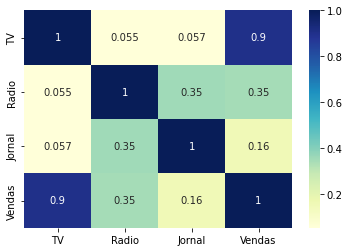

In [5]:
# passo 5 : ANALISE EXPLORATORIA - correlaçao entre as tabelas - se as vendas estao mais relacionadas con TV ou Radio ou Jornal
# passo 5: parte2 - criar grafico - exibir grafico (cmap permite mudar a cor do grafico , annot permite mostrar os nros no grafico)
# sns.heatmap(tabela[["TV", "Vendas"]].corr(), cmap="YlGnBu", annot=True) ex para correlacionar só duas colunas, dois corchetes porque para python [] é igual a lista de informaçoes e [] é coluna, seria [[]] um par para dizer que é uma lista e um par para dizer que é uma coluna

import matplotlib.pyplot as plt
import seaborn as sns


display(tabela.corr())

#plt.figure() tamanho do grafico

sns.heatmap(tabela.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [6]:
# passo 6: MODELAGEM + ALGORITMOS (AQUI QUE ENTRA A INTELIGENCIA ARTIFICIAL SE NECESSARIO)
# é preciso separar a base de dados em duas partes x e y
# dados y = quem vc quer preveer - dados x = quem eu vou usar para preever o y, ou seja o resto da tabela
# sempre passar a a IA uns dados para treino e uns para teste
#random_state=1 para os dados de teste sejam recolhidos uma unica vez.

from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)


In [7]:
#passo 6: parte2 - importar - criar - treinar a IA
#modelos de inteligencia artificial a usar = Regressao Linear - RandomForest (Arvore de Decisao)
#fit = treinar

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression() 
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [8]:
# passo 7: INTERPRETAÇAO DE RESULTADOS - fazer a previsao - comparar a previsao com y_teste
# - testar modelo - funcionalidades - calcular R2
# r2 = percentual que mostra ao 100% quanto a previsao da nossa IA consegue explicar o resultado final(diz o quan bom é nosso modelo)

from sklearn.metrics import r2_score

previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))


0.9287251861938164
0.88155765674174


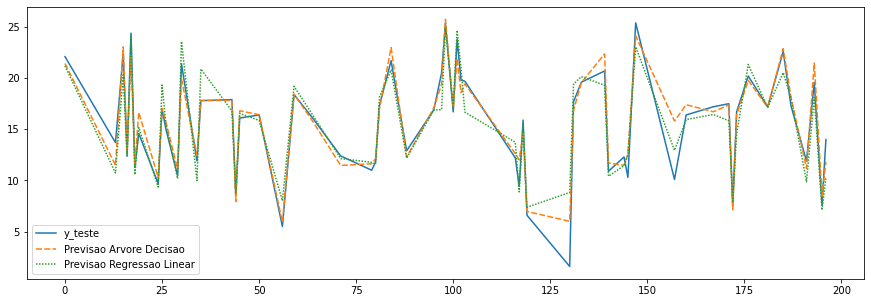

In [9]:
#criaçao de tabela auxiliar para ver os resultados(dataframe é o nome que pd da as tabelas que ele cria) em um grafico de linea lineplot

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsao Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [10]:
# como fazer uma nova previsao de vendas com as informaçoes dos investimentos

tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [11]:
previsao_do_mes = modelo_arvoredecisao.predict(tabela_nova)
print(previsao_do_mes)

[ 7.278  8.718 21.981]
